#### **Region Proposal Networks with Faster R-CNN**

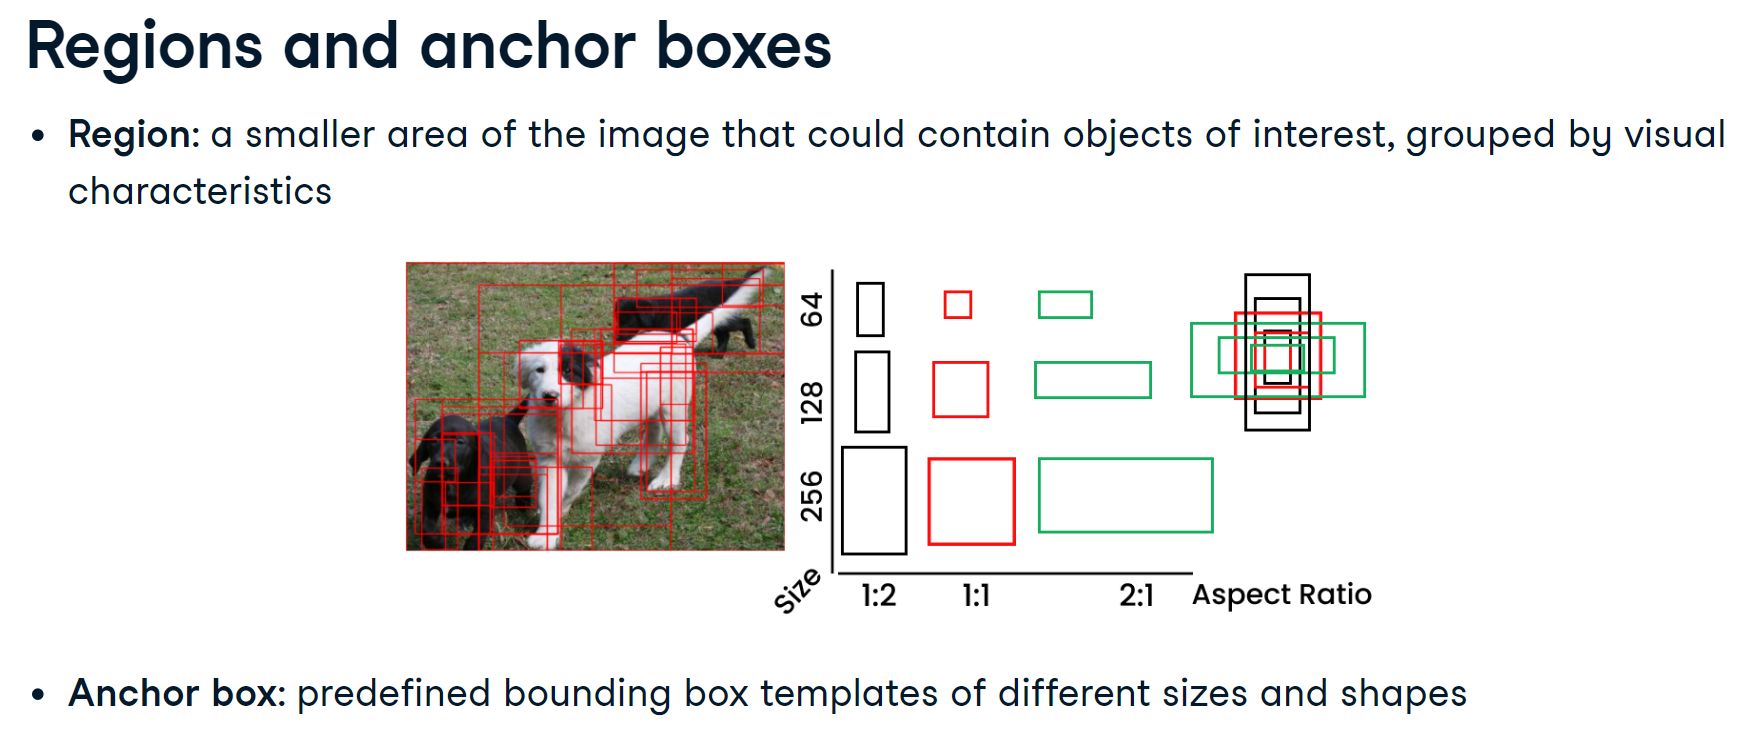

#### **Faster R-CNN Model**

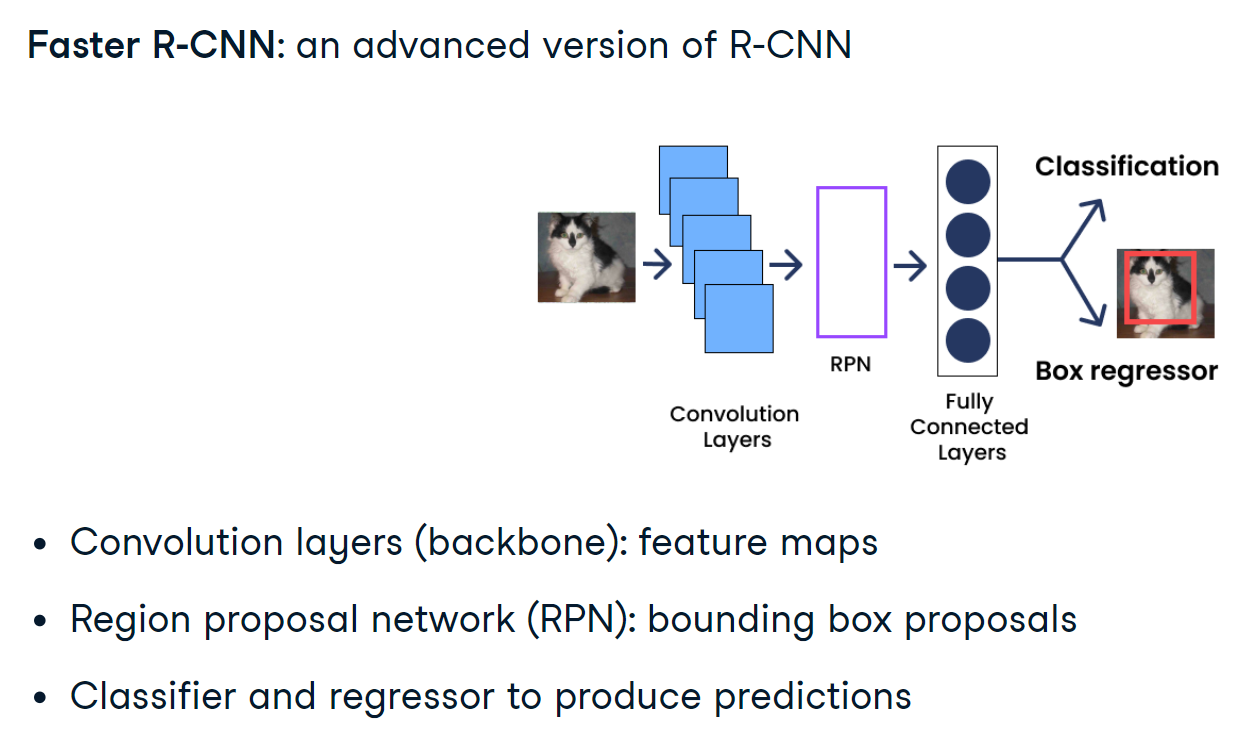

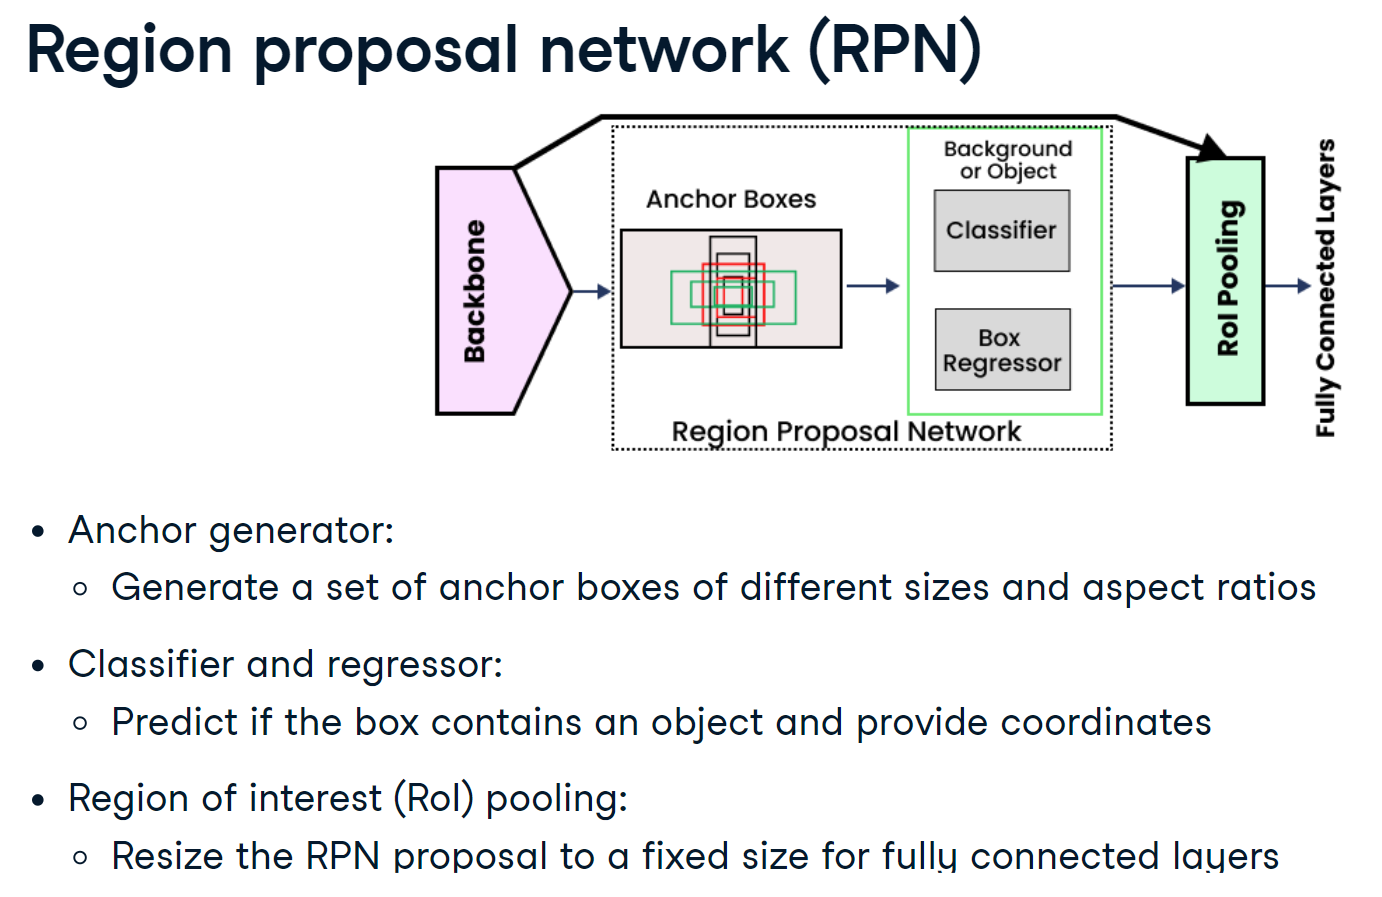

#### **RPN in PyTorch**

In [ ]:
from torchvision.models.detection.rpn import AnchorGenerator

anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128), ),
    aspect_ratios=((0.5, 1.0, 2.0), ),
)

In [ ]:
from torchvision.ops import MultiScaleRoIAlign

roi_pooler = MultiScaleRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2,
)

We use 2 loss functions in RPNs -

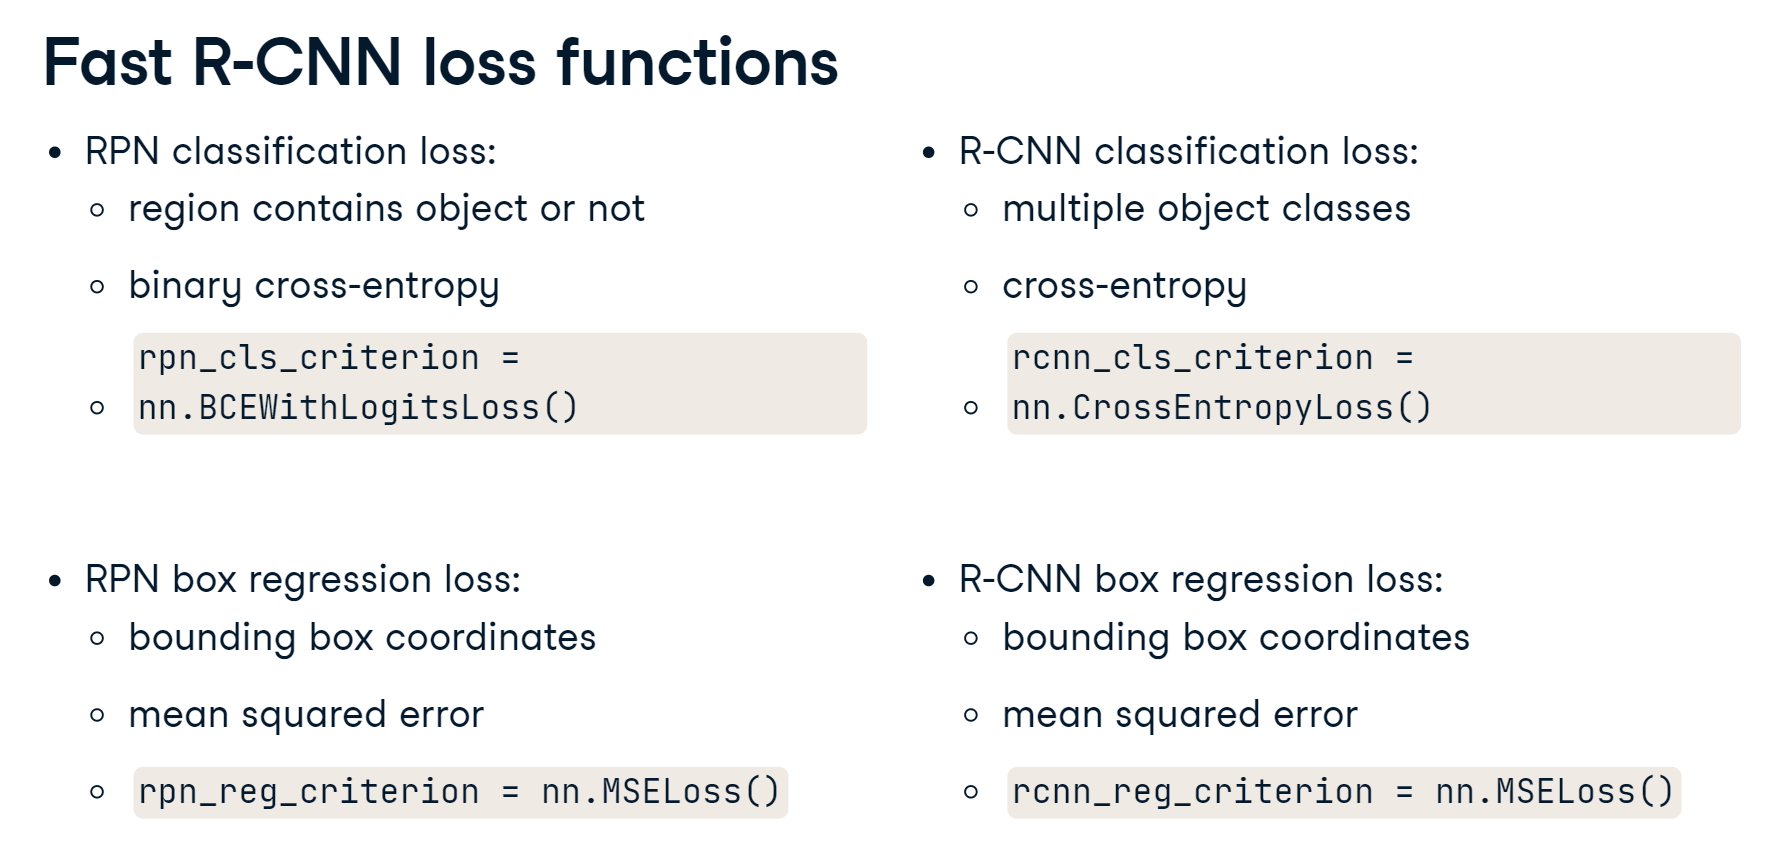

In [ ]:
# Example

import torchvision
from torchvision.models.detection import FasterRCNN

backbone = torchvision.models.mobilenet_v2(weights='DEFAULT').features
backbone.out_channels = 1280

model = FasterRCNN(
    backbone=backbone,
    num_classes=num_classes,
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler,
)

#### **We can also used pre-trained Faster R-CNN model without manually extracting a backbone from a different model** 

Loading pre-trained Faster R-CNN model -

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT')

# let us have 2 classes to perorm binary classification
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replacing model's classifier with a new classifier with the desiered number of classes
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)